### Notebook 1:  Clustering con K-means
En este notebook vamos a implementar el algoritmo de clustering K-means en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

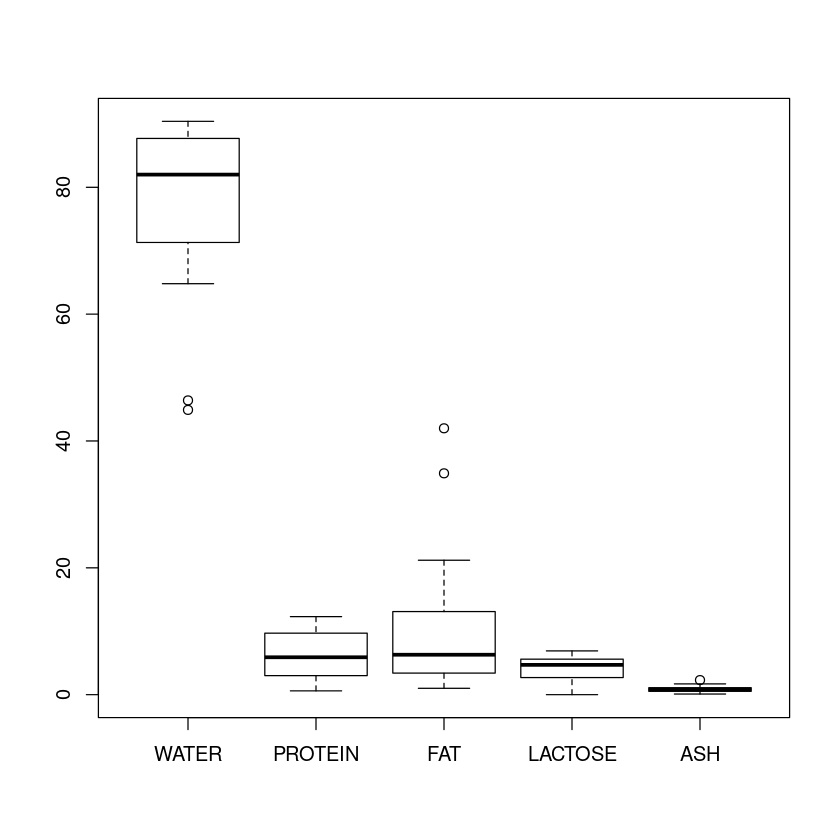

In [1]:
library(cluster)
library(ggplot2)


#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
summary(datos)
boxplot(datos)

**Ejercicio 1:** describa los datos y discuta la pertinencia de realizar un análisis de clustering o agrupamiento

In [19]:
datos

,WATER,PROTEIN,FAT,LACTOSE,ASH
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10
CAMEL,87.7,3.5,3.4,4.8,0.71
BISON,86.9,4.8,1.7,5.7,0.90
BUFFALO,82.1,5.9,7.9,4.7,0.78
GUINEA_PIG,81.9,7.4,7.2,2.7,0.85
CAT,81.6,10.1,6.3,4.4,0.75


<h5>Respuesta:</h5>

Estos datos representan los valores de ciertos componentes presentes en la leche de distintos mamíferos, tales como:
- Porcentaje de agua
- Porcentaje de Proteínas
- Porcentaje de Grasa
- Porcentaje de Lactosa
- Porcentaje de Minerales

Es pertinente realizar un analisis de clustering para descubrir agrupamientos naturales de los datos o detectar anomalias, en este caso, se puede usar para identificar y agrupar mamimeros cuya leche sea similar.

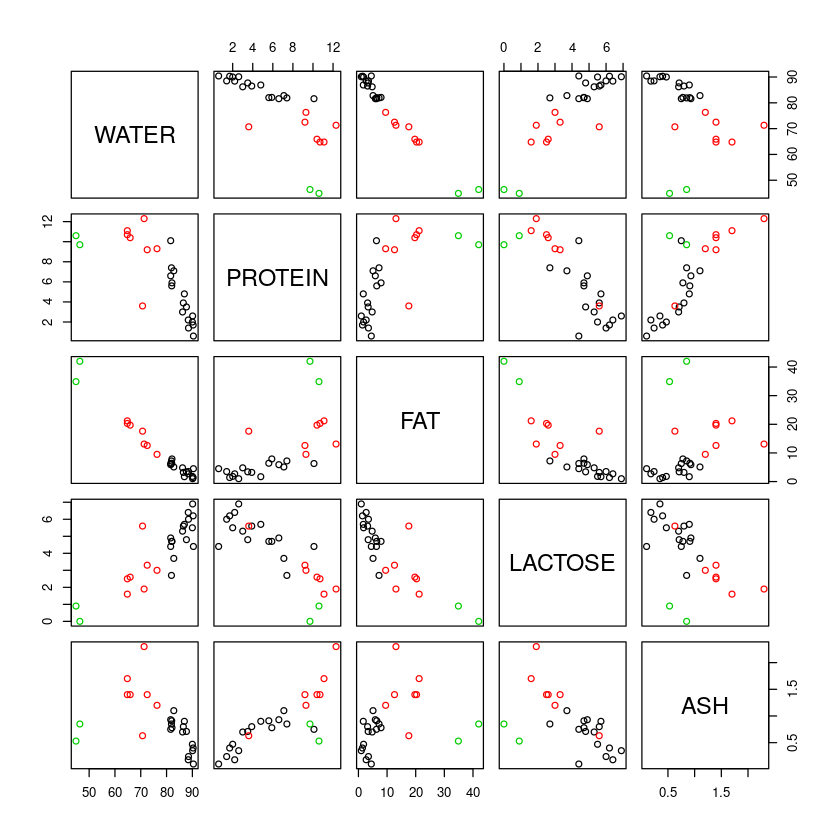

In [2]:
#ingresar valor de k0 
k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

**Ejercicio 2:** Interprete y comente los resultados obtenidos. 

Este grafico presenta las relaciones entre las caracteristicas de nuestro dataset, por ejemplo:
- La cantidad de agua presente en la leche es inversamente proporcional con la cantidad de grasa
- La cantidad de proteinas es proporcional con la cantidad de minerales encontrada en la leche

Además, nos permite verificar si la agrupación de los datos es representativa, es decir, si el agrupamiento está bien definido.

Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1.243827,0.0248324,0.07949783,-0.02299768,0.004865841
-1.748439,0.5834780,-0.20968076,0.06088255,-0.002705362
-3.831081,-2.2408320,0.09790001,-0.02910750,-0.029457957


K-means clustering with 3 clusters of sizes 16, 7, 2

Cluster means:
     WATER   PROTEIN      FAT  LACTOSE      ASH
1 86.06250  4.275000  4.17500 5.118750 0.635625
2 69.47143  9.514286 16.28571 2.928571 1.432857
3 45.65000 10.150000 38.45000 0.450000 0.690000

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          1          1          1 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         1          1          1          1          1          1          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         1          1          2          2          2          2          2 
  REINDEER      WHALE       SEAL    DOLPHIN 
         2          2          3          3 

Within cluster sum of squares by cluster:
[1] 377.2215 299.9911  27.1912
 (between_SS / total_SS =  89.9 %)

Available components:

[1] "cluster"      "centers"

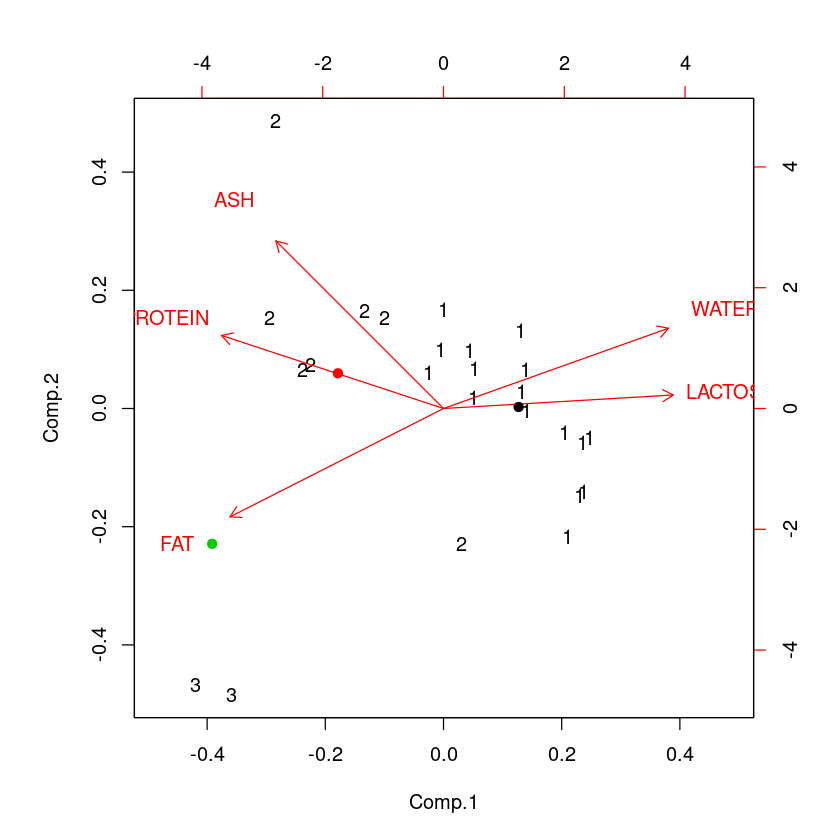

In [3]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)


**Ejercicio 3:** Repita el procedimiento considerando 2 y 4 grupos. Discuta sus resultados.

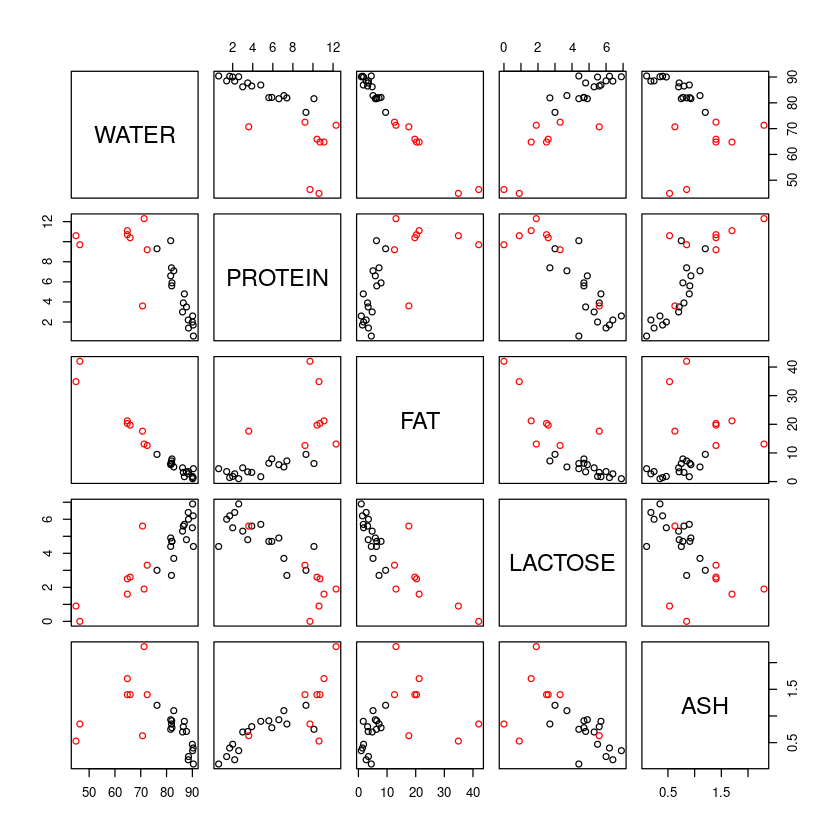

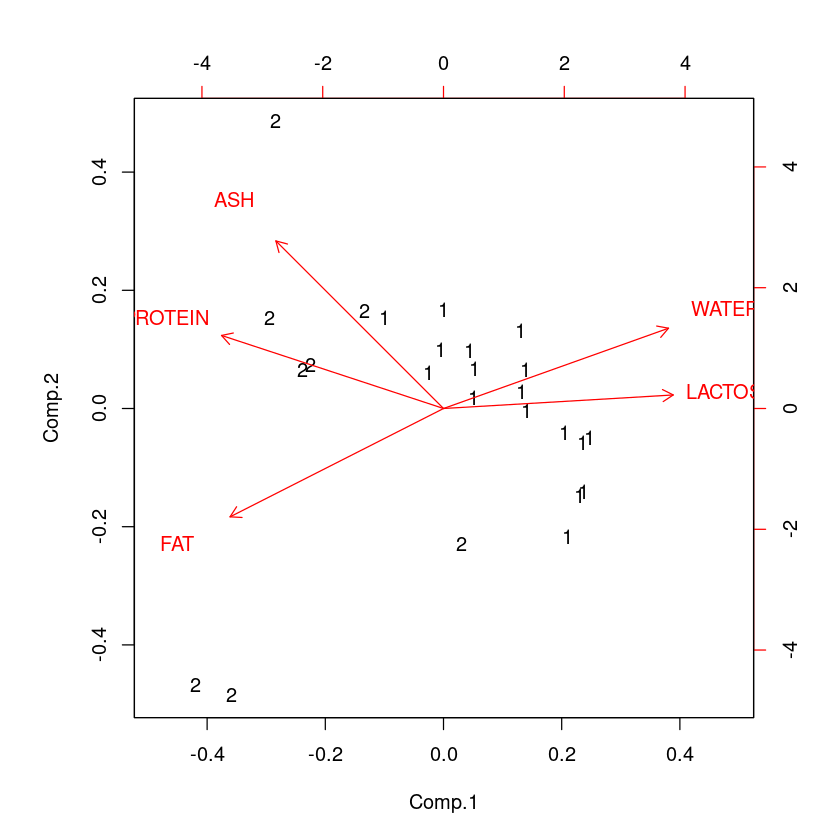

In [31]:
#ingresar valor de k=2
k2=2
cluster_2<-kmeans(datos,k2,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cluster_2$cluster)
comp_2 <- princomp(datos, cor=TRUE)
biplot(comp_2,xlabs=cluster_2$cluster)

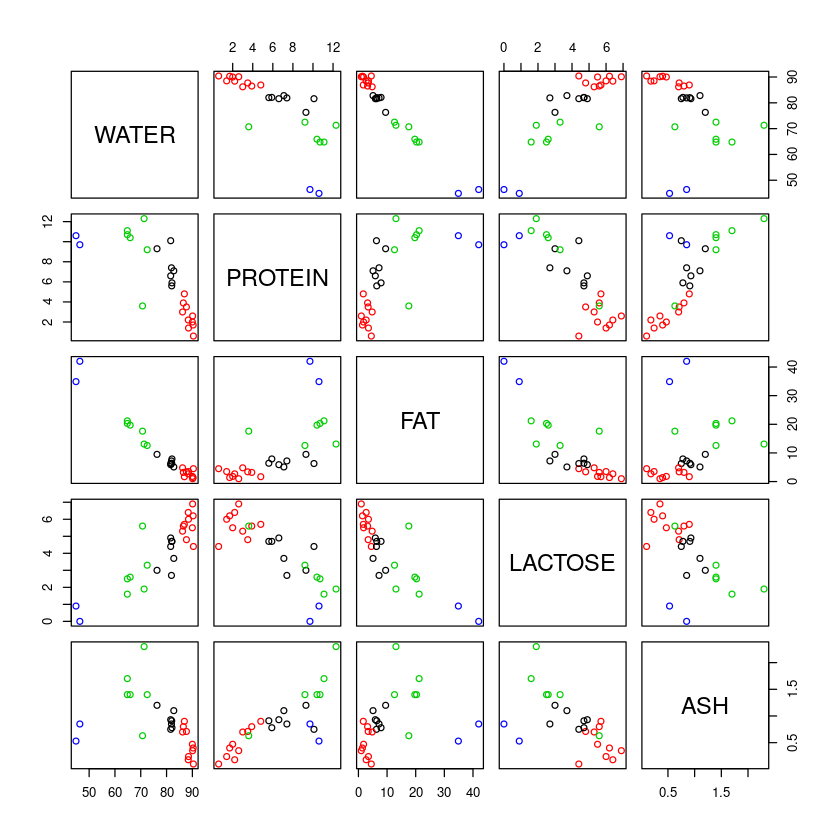

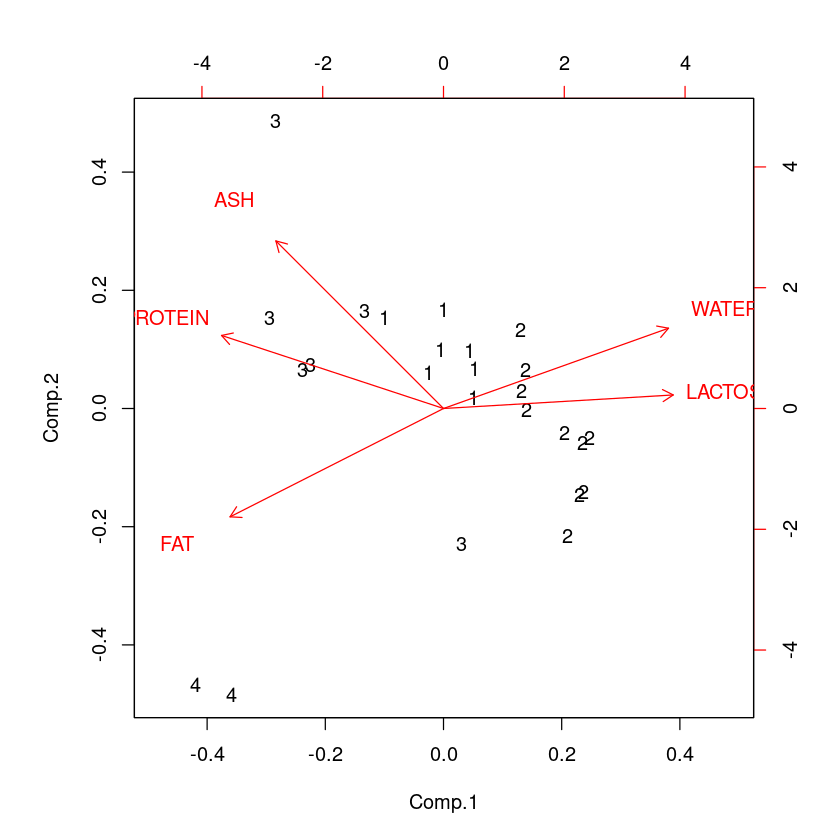

In [32]:
#ingresar valor de k=4
k4=4
cluster_4<-kmeans(datos,k4,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cluster_4$cluster)
comp_4 <- princomp(datos, cor=TRUE)
#res4 <- predict(res,cluster_2$centers)
biplot(comp_4,xlabs=cluster_4$cluster)

Para K=2 se hace una generalización muy amplia de los datos, por ejemplo, si miramos la relación entre la grasa(fat) y los minerales(ash) podemos observar que mientras un grupo esta bien localizado (baja grasa, bajo minerales), el otro grupo está bastante disperso, lo que se puede decir que se pierde definición de los grupos.

Para K=4 podemos ver que existen grupos que están muy cercanos, lo que nos indica que hay poca diferenciación entre ellos, lo que nos puede traer problemas si queremos clasificar nuevos datos.

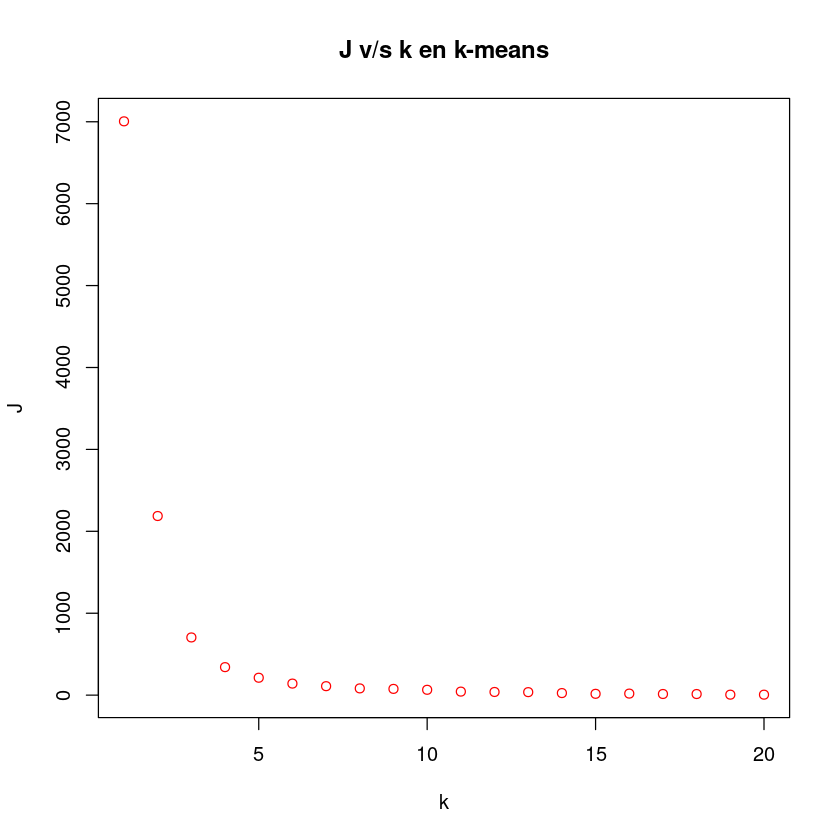

In [4]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
fin_iter<-20


for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

**Ejercicio 4:** de acuerdo al gráfico obtenido, cuál es el valor de K mas apropiado?
Agregue código para automatizar este criterio.

El valor de $K$ más apropiado es $K=3$

In [120]:
val <- 1
thres <- 500
for (i in 2:fin_iter){
    a2 = J[i-1] - J[i]
    b2 = J[i+1] - J[i]
    if ((a2-b2) < thres) break
    val = i
}
print(val)

[1] 3


**Ejercicio 5:** Realice un análisis de clustering con el conjunto de datos iris.csv. Considere para ello las cuatro características numéricas que se proporcionan. Luego realice un análisis respecto a la etiqueta de cada observación. 
Interprete sus resultados. 

In [77]:
dt <-read.csv2("iris.csv",header=TRUE,sep=";")

In [86]:
dataset <- dt[1:4]
class <- dt[5]

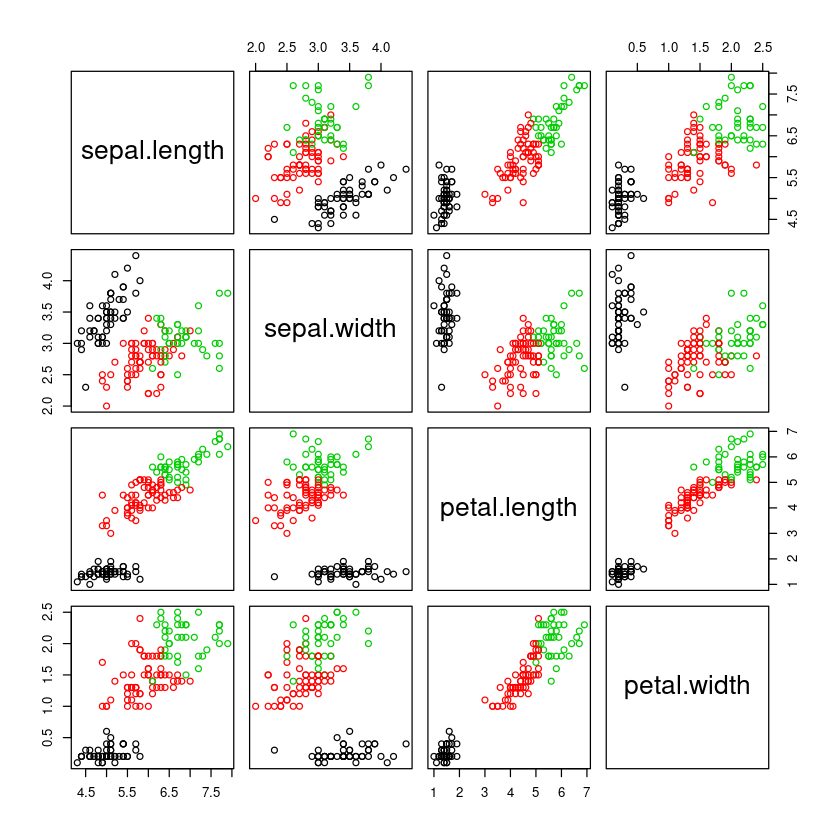

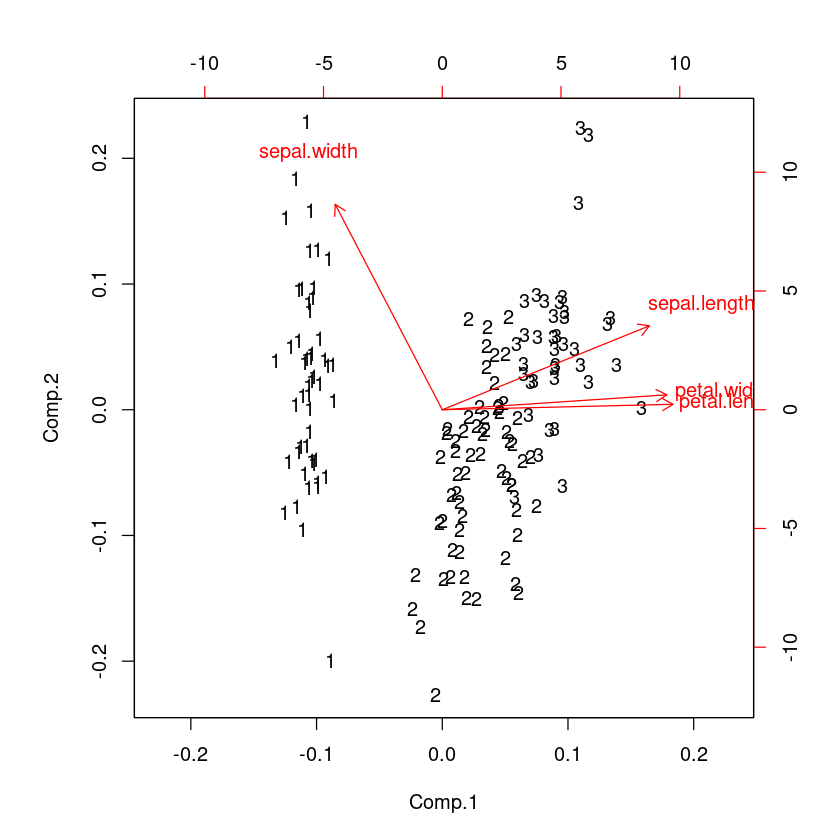

In [122]:
k=3
cluster_iris<-kmeans(dataset,k,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(dataset,col=cluster_iris$cluster)
comp <- princomp(dataset, cor=TRUE)
flower_pred <- predict(comp,cluster_iris$centers)
biplot(comp,xlabs=cluster_iris$cluster)

In [213]:
sum(cluster_iris$cluster == 1)
sum(class$variety == 'Setosa')

[1] 50

[1] 50

Para la clase *Setosa* predijo correctamente todos los datos

In [216]:
sum(class$variety == 'Versicolor')
sum(cluster_iris$cluster == 2)

[1] 50

[1] 62

Para la clase *Versicolor*, de un total de 50 existencias, se predijeron 62

In [217]:
sum(class$variety == 'Virginica')
sum(cluster_iris$cluster == 3)

[1] 50

[1] 38

Para la clase *Virginica*, de un total de 50 existencias, se predijeron 38